# Objectives

We will build a KNN model.

For this, we will use the project.csv dataset that comprises of 

these features: 'XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM', and 'JHZC'
       
and the target feature is 'TARGET CLASS.'

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import seaborn as sea

In [3]:
dproj = pd.read_csv('project.csv')

In [4]:
print(dproj.head())

          XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0  


In [5]:
print(dproj.shape)

(1000, 11)


In [6]:
print(dproj.columns)

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')


In [7]:
print(dproj["TARGET CLASS"].unique())

[0 1]


In [8]:
print(dproj.isnull().sum())

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64


In [9]:
print(dproj.describe())

              XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13

In [10]:
dproj.hist(figsize=(20,20))

array([[<Axes: title={'center': 'XVPM'}>,
        <Axes: title={'center': 'GWYH'}>,
        <Axes: title={'center': 'TRAT'}>],
       [<Axes: title={'center': 'TLLZ'}>,
        <Axes: title={'center': 'IGGA'}>,
        <Axes: title={'center': 'HYKR'}>],
       [<Axes: title={'center': 'EDFS'}>,
        <Axes: title={'center': 'GUUB'}>,
        <Axes: title={'center': 'MGJM'}>],
       [<Axes: title={'center': 'JHZC'}>,
        <Axes: title={'center': 'TARGET CLASS'}>, <Axes: >]], dtype=object)

In [11]:
dprojx = dproj[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']]
dprojy = np.array(dproj['TARGET CLASS']).reshape(-1,1)

##### Applying Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
x = np.array(scaler.fit_transform(dprojx))
y = dprojy

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [17]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(800, 10) (200, 10)
(800, 1) (200, 1)


##### Explanation


k = 5


model is built using k=5 

There is no training. 

Testing k = 5

First test value, x1_t distance between this and all the training points is caluclated and distances from lowest to highest are arranged.

k = 5, what are the first 5 points that are closer to x1_t

first data point is of label 0

second data point is of label 0

third data point is of label 1

fourth data point is of label 1

fifth data point is of label 0

The prediction step - As majority of the 5 nearest neighbors are of label 0, x1_t is of label 0. 

However, x1_t already has a label. Is the Predict label for x1_t same as the True label.

### Building Different models 

To find a optimal number of neighbors, we will build different models with different vlaues for neighbors and then plot K vs the accuracy. 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [21]:
"""
We are fitting models for different values of k. We are then finding accuracy for each model 
and storing it in scores_list.
"""
k_range = range(1, 20)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, np.ravel(y_train))
    y_pred = knn.predict(x_test)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [22]:
# We are plotting accuracy for different values of k
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel("Value of k in KNN")
plt.ylabel("Test Accuracy")

Text(0, 0.5, 'Test Accuracy')

##### Observations from K vs Accuracy plot

From the above plot, we can observe that for most part as K increases, the accuracy increases. 
When 

For K=8 and K=10, the accuracy = 84% 

For K=12, accuracy = 82%, this is a dip

For K=14, the accuracy goes to 86%, which is only 2% more than when K=8. 

Since KNN is computationally expensive, we will consider K=8 as an optimal value.

### Building a KNN model with K=8


In [25]:
# from the above plot, we can say that k=8 gives the best accuracy
# then we build a model with 8 neighbors

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=8)

In [26]:
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.84


In [27]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
y_pred_1d = y_pred.flatten()
y_test_1d = y_test.flatten()
pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

[[89 11]
 [21 79]]


Predicted,0,1,All
True,,,
0,89,11,100
1,21,79,100
All,110,90,200


In [28]:
#!pip install --upgrade scikit-learn

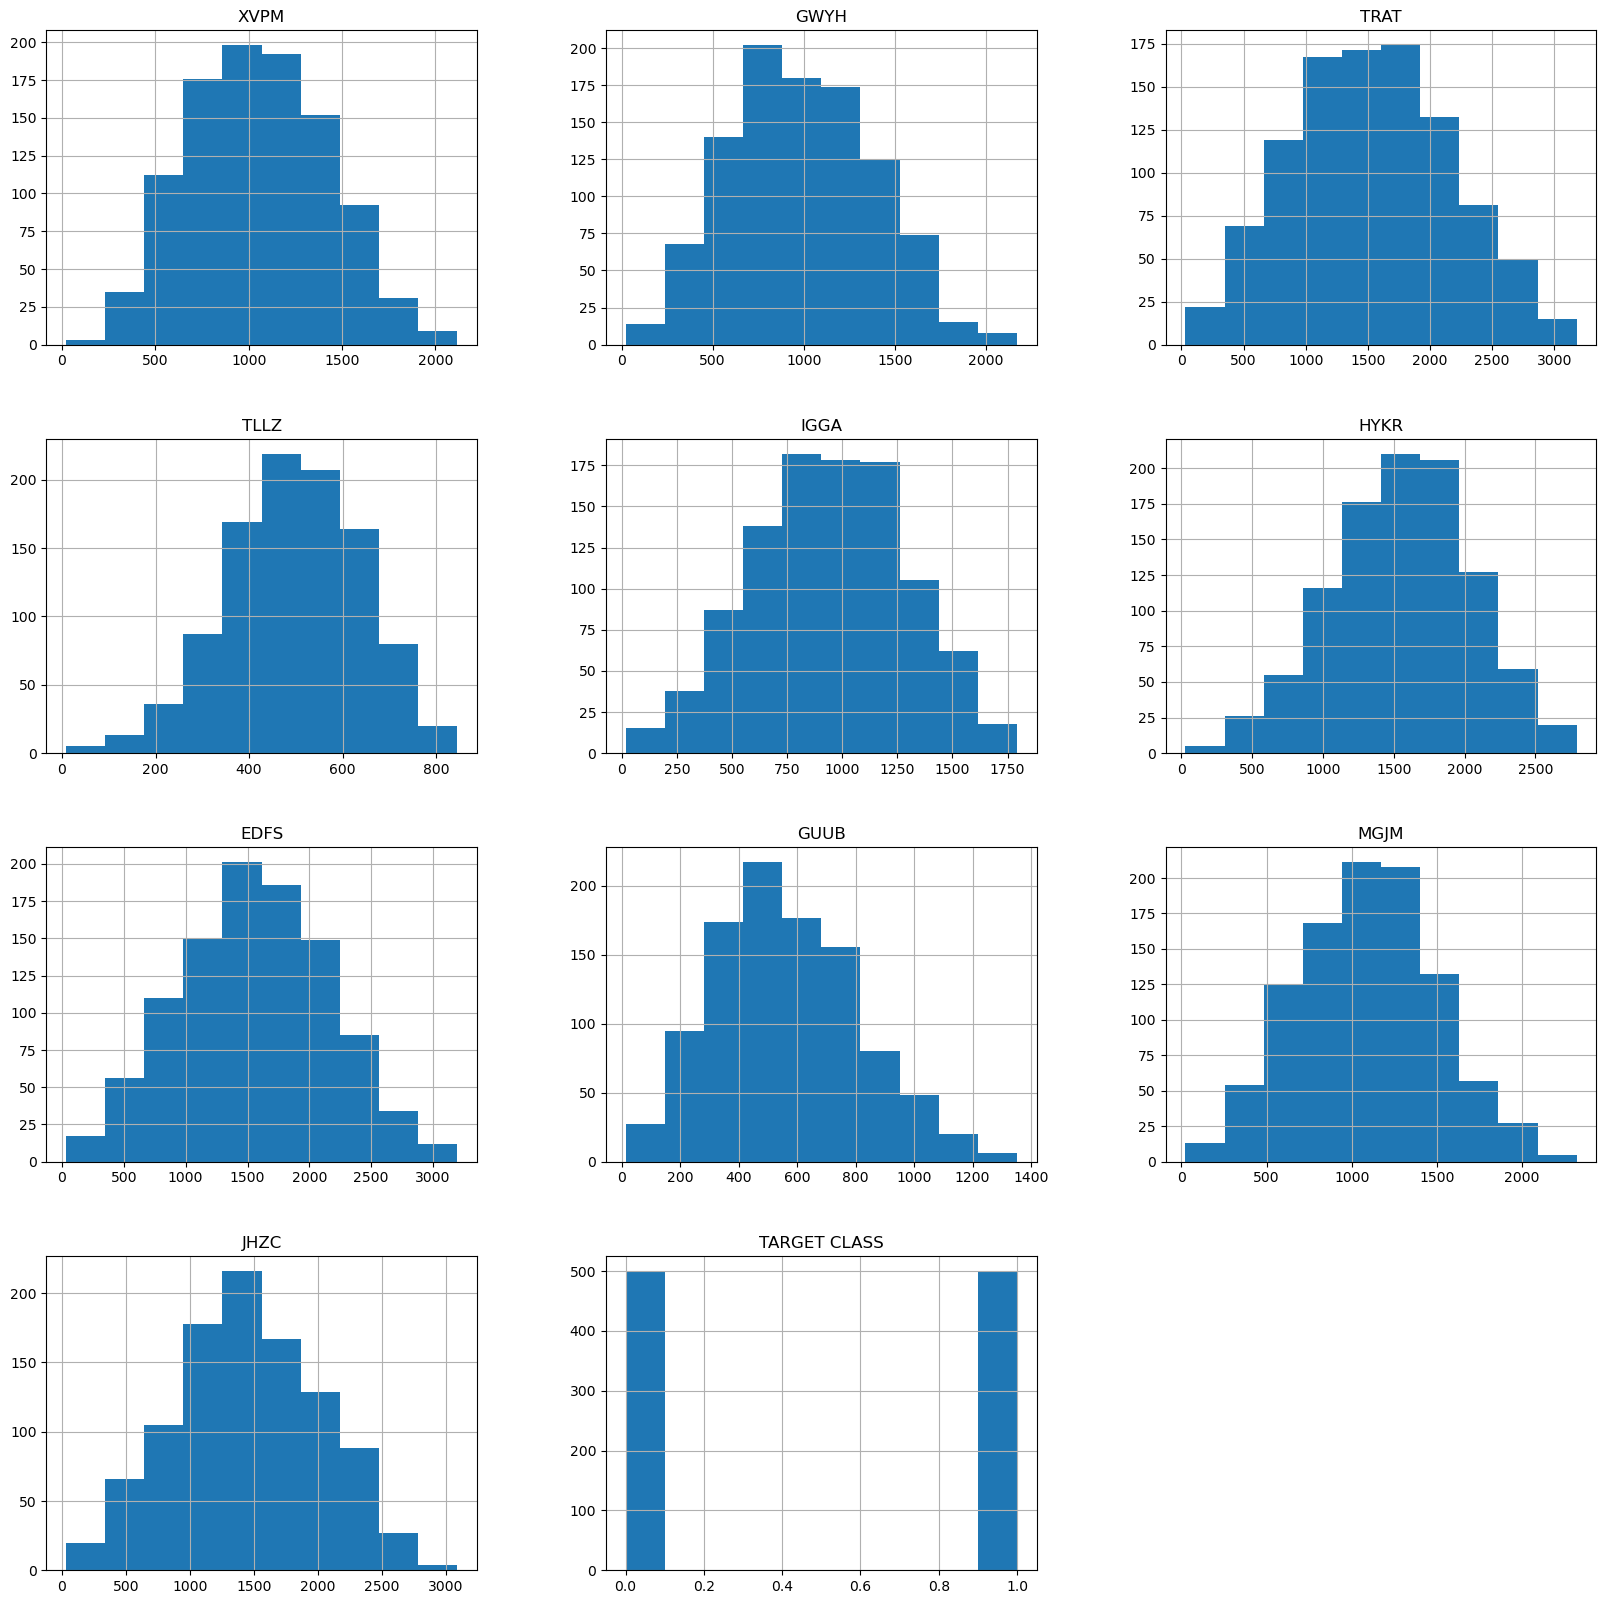

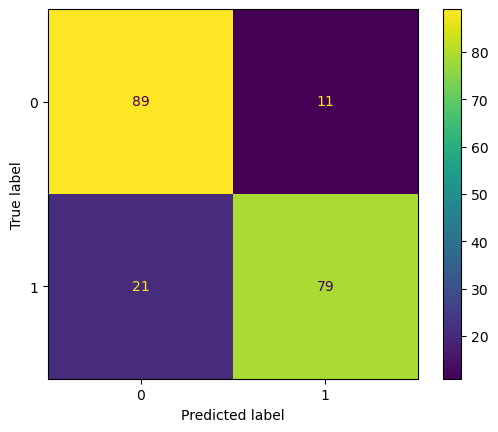

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

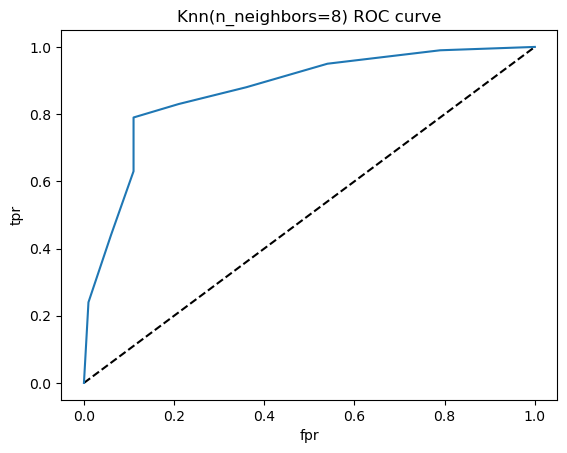

AUC_ROC 0.87035


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

print("AUC_ROC", roc_auc_score(y_test, y_pred_proba))

In-class activity: 

Consider Iris dataset and find the optimal K for KNN between 2 and 10 and then use the optimal K and build a KNN model. Compute accuracy and output confusion matrix.